_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung zu Übung 08 - Archäologie: Werden die Gefäße größer?
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
--- 

Im letzten Tutorium wollen wir die Hypothese aufstellen, dass die Gefäße mit der Zeit größer werden und dann überprüfen, ob die Hypothese richtig oder falsch ist. Dies tun wir, indem wir eine lineare Regression durchführen und ihre statistische Signifikanz überprüfen. Die Ergebnisse stellen wir in sog. Scatterplots dar die es uns erlauben, den Zusammenhang zwischen zwei Variablen zu visualisieren.
* [Scatterplots](#scatterplots)
* [Werden die Gefäße größer?](#gefaesse_groesser)

<a name="datenquellen"></a>1. Scatterplots
---
Als Vorbereitung laden wir wieder den Katalog in das Notebook. WICHTIG: wir brauchen eine Version des Katalogs, die bereits Spalten für das Alter der Scherben (aus Übung 06, Aufgabe **3.B**) enthält, da wir diese für die folgende Analyse brauchen. Für den Fall, dass Ihr die entsprechende Übung nicht gemacht habt und die Datei nicht gespeichert habt, ist eine aktuelle Version der Datei im StudIP hochgeladen.

In [1]:
import pandas as pd
catalogue = pd.read_csv("../daten/ICRATES/ICRATES_CATALOGUE.csv", encoding='ISO-8859-1')
catalogue.head()

/home/jana/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,32,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ICRATES_ID,Publication_ID,Deposit_ID,Location_ID,Location_specific,Fabric_ID,Fabric,Fabric_Uncertain,Standard_Form_ID,Standard_Form_Publication_Uncertain,...,Location_of_Graffito,Comment_Remarks_Graffito,Bibliographic_Reference_Parallels,Comment_Remarks,General_Shape,Function,upper,lower,upper_age,lower_age
0,1,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1,2,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
2,3,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
3,4,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
4,5,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN


Um statistische Zusammenhänge zwischen Beobachtungen darzustellen, eignet sich der Scatterplot. Die Funktion ```plt.scatter(x,y)``` ([Dokumentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html)) erlaubt es uns, einen einfachen Scatterplot zu erstellen:

In [2]:
import matplotlib.pyplot as plt

x = [3,5,7,4]
y = [1,3,2,4]

plt.scatter(x,y)

**A.** Identifiziere alle Spalten im Katalog, die Beobachtungen zur Größe der Gefäße beinhalten.

* _```Min_Rim_Diameter_mm``` und ```Max_Rim_Diameter_mm```
* _```Min_Base_Diameter_mm``` und ```Max_Base_Diameter_mm```
* _```Min_Height_Diameter_mm``` und ```Max_Height_Diameter_mm```

**B.** Stelle den Gefäßdurchmesser (```Min_Rim_Diameter_mm```) über dem Gefäßalter (```upper_age```) dar. Vergiss nicht auf die Beschriftungen.

Text(0,0.5,'Min. Randdurchmesser / mm')

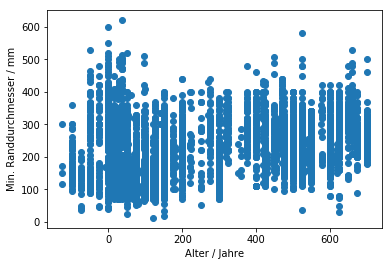

In [3]:
plt.scatter(catalogue['upper_age'],catalogue["Min_Rim_Diameter_mm"])
plt.xlabel('Alter / Jahre')
plt.ylabel('Min. Randdurchmesser / mm')

Der Katalog enthält auch Informationen zur Typologie der Fundstücke in der Spalte ```Fabric``` (siehe Tutorium 06, Aufgabe **3.A**). Wir wollen im Folgenden den Zeitraum, in dem die verschiedenen Typologien hauptsächlich vorkommen, graphisch darstellen.

**C.** Erstelle ein neues DataFrame, in dem die verschiedenen Typologien und die Anzahl der Fundstücke mit der jeweiligen Typologie enthalten sind.
* Iteriere dazu über alle Typologien
* Filtere in jeder Iteration den Katalog nach allen Einträgen mit der aktuellen Typologie und zähle sie
* Speichere die Anzahl in einer Liste

In [4]:
# erstelle eine leere Liste in der wir die Anzahl
# der Fundstücke je Typologie speichern
fabric_number = []

# iteriere über alle (einzigartigen) Typologien
# im DataFrame
for fabric in catalogue['Fabric'].unique():
    # erstelle eine Maske mit der aktuellen Typologie
    mask = catalogue['Fabric'] == fabric
    # filtere das DataFrame mit der Maske
    masked = catalogue[mask]
    # zähle die Anzahl der Fundstücke mit der 
    # gegebenen Typologie
    N = len(masked)
    # füge die Anzahl der Liste hinzu
    fabric_number.append(N)

# erstelle ein neues DataFrame mit den Typologien und der Anzahl
fabric_df = pd.DataFrame({'Fabric': catalogue['Fabric'].unique(),\
                          'Number': fabric_number})

**D. (optional)** Stelle die Verteilung der Fundstücke auf die Typologien in einem Histogram dar. Was Fällt dir auf?

Text(0,0.5,'Anzahl an Typologien')

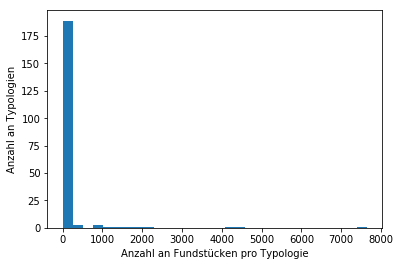

In [5]:
# Histogramm
plt.hist(fabric_df['Number'], bins=30)
# Beschriftungen
plt.xlabel('Anzahl an Fundstücken pro Typologie')
plt.ylabel('Anzahl an Typologien')

* _Offensichtlich gibt es ein paar wenige Typologien, der eine große Anzahl an Fundstücken zugeordnet sind._

Text(0,0.5,'Anzahl an Typologien')

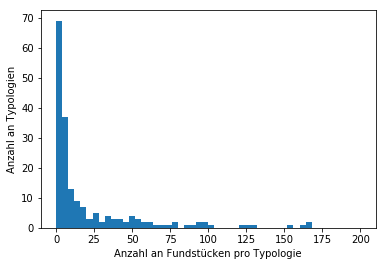

In [6]:
# Histogramm
plt.hist(fabric_df['Number'], bins=50, range=[0,200])
# Beschriftungen
plt.xlabel('Anzahl an Fundstücken pro Typologie')
plt.ylabel('Anzahl an Typologien')

* _Sehen wir uns den Bereich der Typologien mit 200 oder weniger Fundstücken an dann sehen wir, dass ein Großer Teil der 203 Typologien nur 4 oder weniger Fundstücke aufweist._

**E.** Sortiere das neu erstellte DataFrame nach Anzahl der Fundstücke in absteigender Reiheinfolge.  <font color='green'>**HINWEIS** Du kannst dafür die Funktion ```df.sort_values()``` ([Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)) verwenden. </font> Wieviele verschiedene Typologien gibt es? Was sind die 10 Typologien mit den meisten Fundstücken?

In [7]:
# sortiere das DataFrame
fabric_df.sort_values(by='Number', ascending=False, inplace=True)
# gib die Anzahl der verschiedenen Typologien aus
print('Es gibt {} verschiedene Typologien.'.format(len(fabric_df)))
# gib die ersten 10 Einträge des sortierten DataFrames aus. Sie
# entsprechen den Typologien, denen die meisten Fundstücke 
# zugeordnet sind
fabric_df.head(10)

Es gibt 203 verschiedene Typologien.


,Fabric,Number
19,ESA,7647
3,PRSW,4469
2,ARSW,4232
6,ITS,2098
21,Attic,1998
0,ESC,1638
4,CRSW,1524
18,ESBI,1172
1,Candarli,1014
17,ESBII,842


**F.** Erstelle den selben Scatterplot wie in Aufgabe **1.B** noch einmal, aber diesmal nur für die Fundstücke der 10 häufigsten Typologien, mit einer eigenen Farbe und einem eigenen Legendeneintrag je Typologie.
* Iteriere dafür über die ersten 10 Typologien im Typologie-DataFrame
* Filtere den Katalog nach Einträgen mit der aktuellen Typologie
* Nutze den gefilterten Katalog um einen Scatterplot der Fundstücke der aktuellen Typologie zu machen.
* Vergiss nicht, dem Plot ein label mit der aktuellen Typologie zu geben.  

Was fält dir auf?  

<font color='green'>**HINWEIS** Rufst du in der selben Code-Zelle mehrfach eine plot-Funktion (wie z. B. ```plt.scatter()``` auf, benutzt ```matplotlib``` automatisch unterschiedliche Farben für die verschiedenen Datenpunkte im selben Plot. </font>.

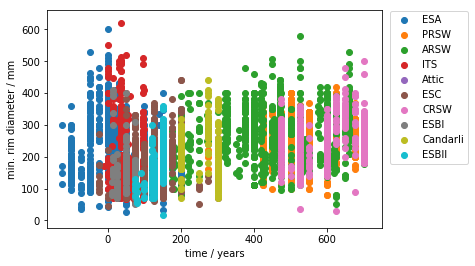

In [8]:
# iteriere über die 10 häufigsten Typologien
for fabric in fabric_df['Fabric'][0:10]:
    # erstelle eine Maske mit der aktuellen Typologie
    mask = catalogue['Fabric'] == fabric
    # filtere den Katalog mit der MAske
    masked = catalogue[mask]
    # erstelle den Scatterplot mit den Einträgen zu Fundstücken,
    # die der aktuellen Typologie zugeordnet sind
    plt.scatter(masked['upper_age'], masked["Min_Rim_Diameter_mm"], label=fabric)

# Achsenbeschriftungen
plt.xlabel('time / years')
plt.ylabel('min. rim diameter / mm')
# Legende, die automatisch aus den "label"-Argumenten der
# Scatterplots in der Schleife oben erzeugt wird
plt.legend(bbox_to_anchor=(1.01,1.02))

* _Die einzelnen Typologien sind recht deutlich auf der Zeitachse voneinander getrennt._
* _Es gibt einen gewissen Überlapp, und z. B. die Fundstücke der Typologie ARSW (African Red Slip Ware) stammen aus einem relativ langen Zeitraum von etwa 500 Jahren, aber die meisten anderen Typologien finden sich nur in einem Zeitraum von 100-200 Jahren._
* _Die Fundstücke scheinen einem leichten Trend hin zu größeren Gefäßen (zumindest größerer Gefäßdurchmesser) in jüngerer Zeit zu folgen. Diesen Trend wollen wir im Folgenden quantifizieren._

[Anfang](#top)

<a name="gefaesse_groesser"></a>2. (optional) Werden die Gefäße größer?
---
In den Scatterplots aus Aufgabe **1.B** und **1.E** ist zu erkennen, dass die Gefäßdurchmesser mit der Zeit größer zu werden scheinen. Während wir solch einen Trend mit freiem Auge zwar in solch einer Abbildung vermuten können, ist es dlch sehr schwierig festzustellen, ob dieser Trend tatsächlich da oder nur eine optische Täuschung ist oder in der relativ großen Streuung der Daten untergeht. Im Folgenden wollen wir deswegen mit der linearen Regression ein Verfahren anwenden, welches uns erlaubt, solch einen vermuteten Trend zu quantifizieren und festzustellen, ob der Trend "statistisch signifikant" ist, oder nicht.

**A. (optional)** Mache dich mit der Funktion ```linregress()``` der Bibliothek SciPy vertraut ([Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)). Was für Eingabewerte verlangt die Funktion? Was für Werte gibt sie aus?

**Eingabewerte:**
* _die unabhängige Variable ```x``` (in unserem Fall die Tweet-Länge in Zeichen)_
* _die abhängige Variable ```y``` (in unserem Fall die Anzahl der Worte je Tweet)_

**Ausgabewerte:**
Die Ausgabewerte der Funktion beschreiben eine Gerade, sowie Maße für die Unsicherheit der Regression
* _```slope``` ist die Steigung der Geraden._
* _```intercept``` ist der Achsenabschnitt der Geraden._
* _der ```rvalue``` ist der "Korrelationskoeffizient" und gibt an, wie stark die abhängige Größe mit der unabhängigen korreliert. Ist ```rvalue=1```, dann steigt die abhängige Größe genau dann wenn, wenn die unabhängige auch steigt. Ist ```rvalue=0```, dann sind die beiden Größen unabhängig voneinander. Ist ```rvalue=-1```, dann sinkt die abhängige Größe, genau dann wenn die unabhängige Größe steigt (anti-korreliert)._
* _der ```pvalue``` ([p-Wert](https://de.wikipedia.org/wiki/P-Wert)) gibt an wie wahrscheinlich es ist eine Testgröße zu erhalten die noch unwahrscheinlicher ist als die beobachtete, unter der Annahme, dass die Nullhypothese (keine Korrelation) wahr ist.._
* _der ```stderr``` ist der [Standardfehler](https://de.wikipedia.org/wiki/Standardfehler) der Steigung._

**B. (optional)** Führe eine lineare Regression des Gefäßdurchmessers über dem Gefäßalter durch. Gib die resultierenden Werte aus. Was bedeuten sie? <font color='green'>**HINWEIS** Die Funktion ```linregress()``` bekommt Probleme, wenn die Daten ```NaN``` Werte enthalten. Deswegen musst du die vorher entfernen. Am besten machst du das mit der Funktion ```dropna()```, die alle Zeilen mit ```NaN```-Werten in einem DataFrame entfernt. Da der Katalog aber in praktisch jeder Zeile irgendwo einen ```NaN``` Wert enthält, ist es sinnvoll, wenn du vorher eine Kopie erstellst, die nur die Spalten beinhaltet, die du auch wirklich brauchst:

In [9]:
# diese Spalten hätten wir gerne im neuen DataFrame
spalten = ['upper_age', 'Min_Rim_Diameter_mm']
# erstelle eine Kopie der drei Spalten des Katalogs
clean_df = catalogue[spalten].copy()
# wirf alle NaN-Werte aus der Kopie heraus.
clean_df = clean_df.dropna()

In [11]:
# importieren des Untermoduls "stats" von SciPy
from scipy import stats

# Lineare Regression des Gefäßdurchmessers über dem Gefäßalter.
# Die resultierenden fünf Werte werden direkt fünf Variablen zugeordnet
slope, intercept, rvalue, pvalue, stderr = \
    stats.linregress(clean_df['upper_age'].dropna(), clean_df['Min_Rim_Diameter_mm'].dropna())

# Ausgabe der Ergebnisse
print('Resultierende Gerade: y(x) = {:1.2f} + ({:1.2f} +- {:1.2f}) * x'.format(intercept, slope, stderr))
print('Korrelationskoeffizient: {:1.2f}, p-Wert: {:1.7f}'.format(rvalue, pvalue))

Resultierende Gerade: y(x) = 169.82 + (0.16 +- 0.00) * x
Korrelationskoeffizient: 0.45, p-Wert: 0.0000000


Da unsere Zeitrechnung etwas komisch ist, müssen wir mit der Interpretation der Ergebnisse aufpassen. Die Zeitrechnung setzt die Nullpunkt zur Geburt Christus, das Alter der Vasen ist inkrementell vom Nullpunkt angegeben. Eine Vase mit Alter "200" ist als 200 Jahre nach Christus geschaffen worden. 
* _Die Nullhypothese ist, dass der Vasendurchmesser nicht mit dem Vasenalter korreliert._
* _Der Vasendurchmesser ist positiv mit dem Alter der Vase korreliert. Die Vasen werden also **größer** je jünger sie sind._
* _Der p-Wert ist null, damit ist es praktisch ausgeschlossen, dass dieses Ergebnis zufällig zustande gekommen ist. Das ergebnis ist statistisch hoch signifikant und wir können die Nullhypothese verwerfen._

**C. (optional)** Die lineare Regression beschreibt eine Linie mit Steigund ```slope``` und Achsenabschnitt ```intercept```. Stelle diese Linie graphisch im selben Scatterplot wie in Aufgabe **1.B** dar. <font color='green'>**HINWEIS** mit der Funktion ```plt.plot(x, y)``` kannst du eine Linie plotten </font>.

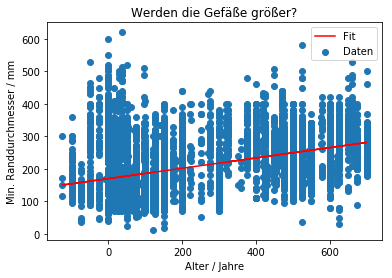

In [12]:
# Scatterplot mit den Daten
plt.scatter(clean_df['upper_age'], clean_df["Min_Rim_Diameter_mm"], label='Daten')

# Linien-Plot der Regression:
# die x-Koordinate (unabhängige Variable) ist das Alter
x = clean_df['upper_age']
# die y-Koordinate (abhängige Variable) ist der Durchmesser
# die Gerade, die den Verlauf des Durchmessers beschreibt,
# ergibt sich aus dem Achsenabschnitt plus die x-Koordinate
# mal der Steigung
y = intercept + x * slope
# Linienplot
plt.plot(x, y, '-', color='red', label='Fit')
# Achsenbeschriftungen, legende, und Titel
plt.xlabel('Alter / Jahre')
plt.ylabel('Min. Randdurchmesser / mm')
plt.title('Werden die Gefäße größer?')
plt.legend()

**D. (optional)** Es gibt verschiedene Maße für die Gefäßdurchmesser und auch verschiedene Abschätzungen für das Alter. Teste ein paar andere Kombinationen aus Gefäßdurchmesser und Alter und überprüfe, ob weiterhin eine Korrelation besteht.

In [15]:
# damit wir nicht so viel tippen bzw. kopieren müssen, erstellen
# wir uns eine Funktion, die die Arbeit für uns erledigt.
# Die Funktion bekommt als Argumente zwei Strings, die Spaltennamen
# des Katalogs sein müssen. Die erste Spalte stellt die unabhängige
# Variable dar (upper_age oder lower_age) und die zweite Spalte sollte
# ein Maß für die Gefäßgröße (abhängige Variable) sein
def test_correlation(var1, var2):
    # erstelle das gesäuberte DataFrame mit den beiden Variablen
    clean_df = catalogue[[var1, var2]].copy()
    clean_df.dropna(inplace=True)

    # führe die lineare Regression durch
    slope, intercept, rvalue, pvalue, stderr = \
    stats.linregress(clean_df[var1], clean_df[var2])

    # graphische Darstellung der Daten als Scatterplot ...
    plt.scatter(clean_df[var1], clean_df[var2], label='data')
    # ... und der Regression als Linienplot
    plt.plot(clean_df[var1], intercept + clean_df[var1] * slope, '-', color='red', label='fit')
    # Beschriftungen
    plt.xlabel(var1)
    plt.ylabel(var2)

    # Ausgabe der Ergebnisse
    print('Resultierende Gerade: y(x) = {:1.2f} + ({:1.2f} +- {:1.2f}) * x'.format(intercept, slope, stderr))
    print('Korrelationskoeffizient: {:1.2f}, p-Wert: {:1.7f}'.format(rvalue, pvalue))

Resultierende Gerade: y(x) = 183.56 + (0.16 +- 0.02) * x
Korrelationskoeffizient: 0.35, p-Wert: 0.0000000


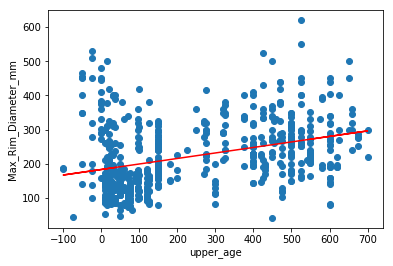

In [16]:
var1 = 'upper_age'
var2 = 'Max_Rim_Diameter_mm'

test_correlation(var1, var2)
# Die Korrelation ist ähnlich groß und positiv, der
# p-Wert ist weiterhin null

Resultierende Gerade: y(x) = 196.22 + (0.16 +- 0.02) * x
Korrelationskoeffizient: 0.35, p-Wert: 0.0000000


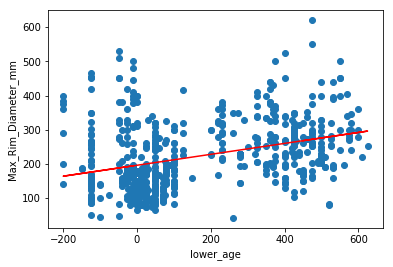

In [17]:
var1 = 'lower_age'
var2 = 'Max_Rim_Diameter_mm'

test_correlation(var1, var2)
# Die Korrelation ist ähnlich groß und positiv, der
# p-Wert ist weiterhin null

Resultierende Gerade: y(x) = 82.01 + (0.12 +- 0.02) * x
Korrelationskoeffizient: 0.40, p-Wert: 0.0000000


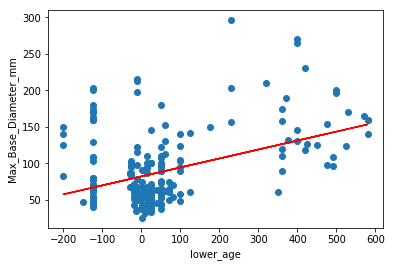

In [18]:
var1 = 'lower_age'
var2 = 'Max_Base_Diameter_mm'

test_correlation(var1, var2)
# Die Korrelation ist ähnlich groß und positiv, der
# p-Wert ist weiterhin null

* _Die Korrelation scheint weiterhin zu bestehen und statistisch signifikant zu sein, egal welches Maß wir für den Gefäßdurchmesser und welche Abschätzung wir für das Alter nehmen._

**E. (optional)** Es gibt auch die beiden Maße für die Gefäßhöhe: ```Min_Height_mm``` und ```Max_Height_mm```. Teste auch diese beiden Maße auf Korrelation mit dem Alter der Gefäße. Was schließt du aus den Ergebnissen?

Resultierende Gerade: y(x) = 41.57 + (0.00 +- 0.00) * x
Korrelationskoeffizient: 0.02, p-Wert: 0.3043971


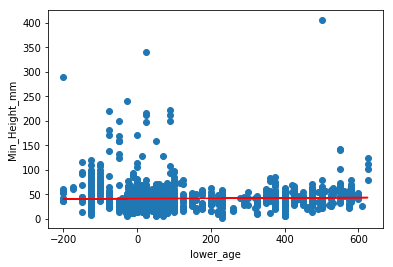

In [19]:
var1 = 'lower_age'
var2 = 'Min_Height_mm'

test_correlation(var1, var2)
# Die Korrelation ist nahe null, der
# p-Wert ist deutlich größer als 0.05, was der
# typische Wert für ein Konfidenzintervall ist.
# Wir schließen daraus, dass wir die Nullhypothese
# nicht verwerfen können und es keine Korrelation 
# ziwschen minimaler Gefäßhöhe und Alter gibt.

Resultierende Gerade: y(x) = 47.65 + (0.01 +- 0.00) * x
Korrelationskoeffizient: 0.11, p-Wert: 0.0503386


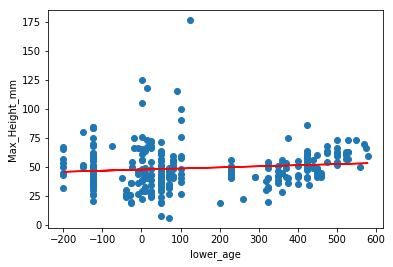

In [20]:
var1 = 'lower_age'
var2 = 'Max_Height_mm'

test_correlation(var1, var2)
# Die Korrelation ist hier zwar etwas größer und
# der p-Wert sehr nahe an 0.05, trotzdem ist die
# Korrelation deutlich niedriger als bei den Maßen
# für den Gefäßdurchmesser und das Ergebnis gerade
# so nicht statistisch signifikant.

* _Wir können aus diesen Ergebnissen schließen, dass sich über die Jahre zwar der Durchmesser der Gefäße vergrößert hat, ihre Höhe dabei aber nicht zugenommen hat._

[Anfang](#top)